# 分析imdb电影数据

## 简介

>**项目简介：** 研究的数据集来自imdb的电影数据，包含电影的简介、收入、时长、评分、上映时间等数据。本项目主要从电影的评分、类别等下手，研究电影平均评分的高低与电影类型、受欢迎程度、演员与导演、票房收入等的关系。   


> **探索问题：**  
1、什么类型的电影平均评分更高？  
2、哪些导演的电影作品质量更高呢？  
3、随着时间的推移，电影每年的总票房收入呈什么趋势发展？  

## 步骤  
### 一、了解数据
#### 1.导入数据

In [1]:
# 加载必要的包
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# 导入数据集
# 查看数据集前5行，大致了解数据的结构
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# 查看各列的数据格式和数据量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **我们发现该数据集一共有10866条数据，部分数据存在缺失值，其中“homepage”、“tagline”、“keywords”和“production_companies”列数据缺失较大。回到我们开始所需研究的问题上，发现这些缺失较大的数据列对所研究的问题没有多大的影响，所以之后直接删掉即可。**  
>   
> **接下来，我们就开始整理这些数据了。我们需要查找数据是否有重复行，各列数据中是否有错误值或格式不对的数据，然后给出合适的方法解决掉这些数据，得到一份正确的可供分析使用的数据。**   

### 二、整理数据
#### 1.删除重复值

In [4]:
# 查找重复数据的数量
df.duplicated().sum()

1

In [5]:
# 只有一条重复的数据，删掉即可
df.drop_duplicates(inplace=True)

In [6]:
# 分别查看这id列和imdb_id列的唯一值
df.id.nunique(), df.imdb_id.nunique()

(10865, 10855)

In [7]:
# 发现这两列都唯一，但是imdb_id列缺失10条数据
# 我们来查看缺失imdb_id的数据
df[df['imdb_id'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


#### 2.删除缺失值和无效值

In [8]:
# 发现这些数据的“预算”和“收入”等数据缺失，不符合我们的研究要求，所以直接删掉
df.dropna(subset=['imdb_id'], inplace=True)  

In [9]:
# 删除掉无用的数据列
df_new = df.drop(['id','homepage', 'tagline','keywords','overview', 'budget','revenue'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 14 columns):
imdb_id                 10855 non-null object
popularity              10855 non-null float64
original_title          10855 non-null object
cast                    10779 non-null object
director                10815 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              10855 non-null float64
revenue_adj             10855 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 975.3+ KB


> **由于'budget'和'revenue'列表示预算和收入，没有考虑通货膨胀因素，因此在实际研究中使用“budget_adj”和“revenue_adj”更为准确。**    
>   
>**数据中的一些缺失值不影响实际的分析，所以数据保留。**   



In [10]:
# 查看数据是否有0值
(df_new == 0).sum()

imdb_id                    0
popularity                 0
original_title             0
cast                       0
director                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5687
revenue_adj             6006
dtype: int64

> **runtime、budget_adj、revenue_adj出现0值，删掉这些0值的行就好**

In [11]:
# 删掉0值行
df_1 = df_new.replace(0, np.nan).dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
imdb_id                 3805 non-null object
popularity              3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 341.9+ KB



#### 3.保存新数据


In [12]:
df_1.to_csv('tmdb_data.csv', index=False)

> **这样，我们就得到了一份干净的可供分析的数据**

### 三、分析数据

In [13]:
df = pd.read_csv('tmdb_data.csv')
df.head()

,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 14 columns):
imdb_id                 3805 non-null object
popularity              3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 312.2+ KB


In [15]:
# 拆分“主演”列
cast_list = df['cast'].str.cat(sep = '|').split('|')

In [54]:
all_cast = pd.Series(cast_list)
all_cast.value_counts()[:10]

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Sylvester Stallone    34
Morgan Freeman        34
Harrison Ford         34
Brad Pitt             34
dtype: int64

> **以上是主演出现次数最多的排名，最高是Robert De Niro的52部电影**

### 研究问题1：什么类型的电影平均评分最高？  
> **步骤**：  
<li>加载数据，查看电影类型数据</li>  
<li>通过分列，将电影类型拆分出来并入新的行，之后统计所有的电影类型</li>  
<li>计算各种电影类型的平均评分</li>  
<li>将得出的结果可视化，通过柱状图，平均评分由高到低排列</li>

In [22]:
# 定义拆分合并函数
def split_data(self):
    splits = df[self].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename(self)
    df_new = df.drop(self, axis=1).join(splits)
    return df_new

In [23]:
# 拆分geners列，转换为行
df_genres = split_data('genres')
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10180 entries, 0 to 3804
Data columns (total 14 columns):
imdb_id                 10180 non-null object
popularity              10180 non-null float64
original_title          10180 non-null object
cast                    10180 non-null object
director                10180 non-null object
runtime                 10180 non-null float64
production_companies    10180 non-null object
release_date            10180 non-null object
vote_count              10180 non-null int64
vote_average            10180 non-null float64
release_year            10180 non-null int64
budget_adj              10180 non-null float64
revenue_adj             10180 non-null float64
genres                  10180 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 914.6+ KB


In [24]:
gen_ave = df_genres.groupby('genres').mean()['vote_average']
gen_ave.sort_values(ascending=False)

genres
Documentary        6.757692
War                6.586555
History            6.577344
Western            6.467308
Drama              6.402140
Animation          6.387940
Music              6.308397
Crime              6.300000
Mystery            6.192711
Romance            6.189514
Family             6.134293
Adventure          6.127052
Thriller           6.069347
Fantasy            6.066076
Foreign            6.055556
Action             6.038197
Science Fiction    6.026306
Comedy             6.024569
Horror             5.720261
TV Movie           5.600000
Name: vote_average, dtype: float64

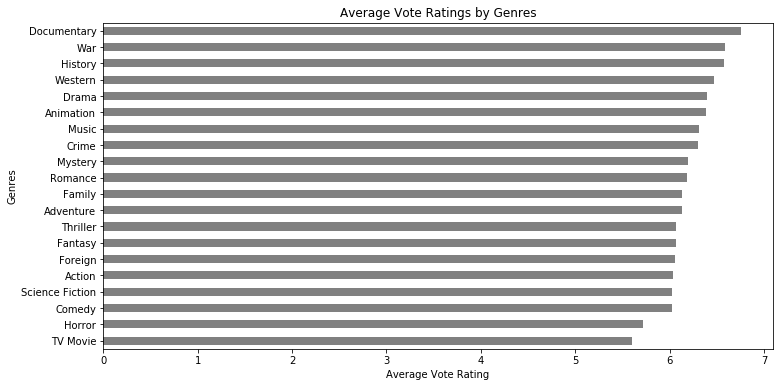

In [30]:
# 输出柱状图，按平均评分高低排序
plt.figure(figsize=(12,6))
gen_ave.sort_values().plot(kind = 'barh',color = 'gray')
plt.title('Average Vote Ratings by Genres')
plt.xlabel('Average Vote Rating')
plt.ylabel('Genres');

> **从上图可以看出，Documentary类型的电影平均评分最高，往下是War、History类型**

### 研究问题 2：哪些导演的电影作品质量更高呢？
> **步骤**：  
<li>查找出所有出现的导演的总数</li>  
<li>把导演列数据拆分出来并汇总到总数据中</li>  
<li>剔除作品少于2部的导演的数据</li>  
<li>计算groupby方法求出各位导演的电影作品的平均评分，并按由高到低展示出来</li>

In [31]:
# 通过split_data函数把导演数据拆分出行加入到数据中
df_director = split_data('director')
df_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4109 entries, 0 to 3804
Data columns (total 14 columns):
imdb_id                 4109 non-null object
popularity              4109 non-null float64
original_title          4109 non-null object
cast                    4109 non-null object
runtime                 4109 non-null float64
genres                  4109 non-null object
production_companies    4109 non-null object
release_date            4109 non-null object
vote_count              4109 non-null int64
vote_average            4109 non-null float64
release_year            4109 non-null int64
budget_adj              4109 non-null float64
revenue_adj             4109 non-null float64
director                4109 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 369.2+ KB


In [32]:
# 剔除作品少于两部的导演
d_count = df_director.groupby(by = ['director']).size()
d_list = list(d_count[d_count >= 2].index)


df_director = df_director[df_director.director.isin(d_list)]
df_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 0 to 3804
Data columns (total 14 columns):
imdb_id                 3132 non-null object
popularity              3132 non-null float64
original_title          3132 non-null object
cast                    3132 non-null object
runtime                 3132 non-null float64
genres                  3132 non-null object
production_companies    3132 non-null object
release_date            3132 non-null object
vote_count              3132 non-null int64
vote_average            3132 non-null float64
release_year            3132 non-null int64
budget_adj              3132 non-null float64
revenue_adj             3132 non-null float64
director                3132 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 281.4+ KB


In [33]:
# 计算各位导演的电影平均评分
director_vote = df_director.groupby('director').mean()['vote_average']
# 按评分高低排序
director_vote.sort_values(ascending=False).head()

director
Christopher Nolan    7.637500
Pete Docter          7.633333
Terry Jones          7.550000
Gabriele Muccino     7.450000
Stanley Kubrick      7.450000
Name: vote_average, dtype: float64

> **我们列出平均评分由高到低排序的前五位电影导演，发现Christopher Nolan导演的电影平均评分最高，达到了7.6分**

In [37]:
# 查看平均评分最高的电影导演“克里斯托弗·诺南”执导的所有电影
director_CN = df[df['director'] == 'Christopher Nolan']
director_CN

,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
160,tt0816692,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169.0,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
514,tt1375666,9.363643,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148.0,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,1.600000e+08,8.255000e+08
925,tt0468569,8.466668,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152.0,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09
1323,tt0278504,1.111488,Insomnia,Al Pacino|Robin Williams|Maura Tierney|Hilary ...,Christopher Nolan,118.0,Crime|Mystery|Thriller,Section Eight|Alcon Entertainment|Witt/Thomas ...,5/24/02,564,6.6,2002,5.576402e+07,1.378521e+08
1470,tt1345836,6.591277,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,165.0,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...,7/16/12,6723,7.5,2012,2.374361e+08,1.026713e+09
2057,tt0372784,5.400826,Batman Begins,Christian Bale|Michael Caine|Liam Neeson|Katie...,Christopher Nolan,140.0,Action|Crime|Drama,DC Comics|Legendary Pictures|Warner Bros.|DC E...,6/14/05,4914,7.3,2005,1.674845e+08,4.178388e+08
2226,tt0482571,2.582095,The Prestige,Hugh Jackman|Christian Bale|Michael Caine|Scar...,Christopher Nolan,130.0,Drama|Mystery|Thriller,Touchstone Pictures|Syncopy,10/19/06,2519,7.8,2006,4.326677e+07,1.186335e+08
3051,tt0209144,3.095625,Memento,Guy Pearce|Carrie-Anne Moss|Joe Pantoliano|Mar...,Christopher Nolan,113.0,Mystery|Thriller,Summit Entertainment|Newmarket Capital Group|T...,10/11/00,2144,7.9,2000,1.139663e+07,5.030104e+07


In [53]:
# 查看诺南导演的电影的评分情况
director_CN[['original_title', 'vote_average']].sort_index(by = 'vote_average', ascending = False)

I:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,original_title,vote_average
925,The Dark Knight,8.1
160,Interstellar,8.0
514,Inception,7.9
3051,Memento,7.9
2226,The Prestige,7.8
1470,The Dark Knight Rises,7.5
2057,Batman Begins,7.3
1323,Insomnia,6.6


> **进一步分析，我们看到诺南导演的8部电影中，《黑暗骑士（The Dark Knight）》以8.1的高分排到了第一位，紧接着是8.0分的《星际穿越（Interstellar）》，《盗梦空间（Inception）》以7.9分排到了第三。**

### 研究问题 3：随着时间的推移，电影每年的总票房收入呈什么趋势发展？  
想要得出这个问题的结论，我们需要研究数据里每年的总收入和电影发行年份之间的关系。由于数据里电影发行年份跨度较大，距今较近年份的收入与距今较远年份的收入之间受通货膨胀影响较大，所以我们在计算每年的票房总收入时，用根据通货膨胀调整的收入（2010年，美元）为统计标准。

> **步骤**：   
<li>用groupby方法计算出每年的票房总收入</li>  
<li>输出随时间变化的总票房收入折线图</li>  
<li>分析并得出结果</li>

In [58]:
# 查看所有的年份
print(set(df['release_year']))

# 查看一共有多少个年份
print('一共有{}个年份'.format(len(set(df['release_year']))))

{1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
一共有56个年份


> release_year列一共有10855条数据，与所有数据数量一致，且没有空值。该列数据类型为int，所以该列数据没有异常，可以直接拿来使用。

In [59]:
# 用groupby方法求出每年的票房总收入
sum_adj = df.groupby('release_year').sum()['revenue_adj']

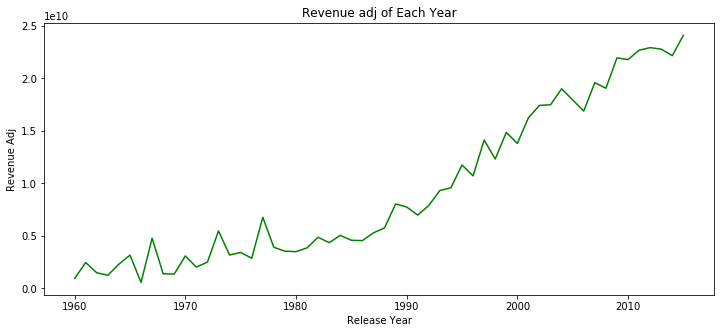

In [60]:
# 画出每年总票房收入的折线图
plt.figure(figsize = (12,5))
sum_adj.plot(color = 'green')
plt.title('Revenue adj of Each Year')
plt.xlabel('Release Year')
plt.ylabel('Revenue Adj');

> **通过折线图表示从1960年到2015年以来，每年的票房总收入，可以看出折线呈上升趋势。这意味着，随着时间的推移，总票房收入呈上升趋势**